# Практическое руководство по анализу данных


---

# Рабочее окружение: Jupyter

### Ноутбуки (тетрадки)

- Разметка
- Возможность вывода графиков, изображений и тд.

### Редактирование python-файлов

- Как создавать файлы
- Идея: выносить сложные куски кода в python-модули, в ноутбуке оставлять эксперименты

### Работа в консоли

- Вызов команд консоли из ноутбука: `!ls -l`
- Использование терминала

In [1]:
!wget

wget: missing URL
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.


In [2]:
!ls

Dockerfile           adult.data           environment.yml
Dockerfile.datanight advanced.ipynb       scripts
Introduction.ipynb   baseline.ipynb       submit.py
README.md            datanight.py         template.ipynb


In [3]:
!tar xvf 

tar: Option f requires an argument
Usage:
  List:    tar -tf <archive-filename>
  Extract: tar -xf <archive-filename>
  Create:  tar -cf <archive-filename> [filenames...]
  Help:    tar --help


In [4]:
!unzip

UnZip 5.52 of 28 February 2005, by Info-ZIP.  Maintained by C. Spieler.  Send
bug reports using http://www.info-zip.org/zip-bug.html; see README for details.

Usage: unzip [-Z] [-opts[modifiers]] file[.zip] [list] [-x xlist] [-d exdir]
  Default action is to extract files in list, except those in xlist, to exdir;
  file[.zip] may be a wildcard.  -Z => ZipInfo mode ("unzip -Z" for usage).

  -p  extract files to pipe, no messages     -l  list files (short format)
  -f  freshen existing files, create none    -t  test compressed archive data
  -u  update files, create if necessary      -z  display archive comment
  -x  exclude files that follow (in xlist)   -d  extract files into exdir

modifiers:                                   -q  quiet mode (-qq => quieter)
  -n  never overwrite existing files         -a  auto-convert any text files
  -o  overwrite files WITHOUT prompting      -aa treat ALL files as text
  -j  junk paths (do not make directories)   -v  be verbose/print version info
 

# Получение и работа с данными

## Табличные данные

In [1]:
import pandas

In [ ]:
pandas.read_csv('http://')

In [ ]:
pandas.read_csv('')

## Таблицы со станиц интернета

In [7]:
import pandas

In [ ]:
tables = pandas.read_html(
    'https://en.wikipedia.org/w/index.php?search=Dow+Jones+Industrial+Average&title=Special%3ASearch&go=Go', 
    attrs={'class': 'wikitable'},  # фильтруем только таблицы с данными
    header=0, # делаем первую строчку — заголовком
)

In [ ]:
tables[0]

## Использование HTTP API

Пример API:
 - Яндекс Карты

In [10]:
import requests
import json

In [171]:
resp = requests.get(
    'https://geocode-maps.yandex.ru/1.x/',
    params={'format': 'json', 'geocode': 'Масква Тверская улца дом 7'},
)

In [172]:
found = resp.json()['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']

In [173]:
print json.dumps(found, indent=2, encoding='utf8', ensure_ascii=False)

{
  "metaDataProperty": {
    "GeocoderMetaData": {
      "text": "Россия, Москва, Тверская улица, 7", 
      "kind": "house", 
      "AddressDetails": {
        "Country": {
          "CountryName": "Россия", 
          "AdministrativeArea": {
            "AdministrativeAreaName": "Москва", 
            "Locality": {
              "Thoroughfare": {
                "Premise": {
                  "PremiseNumber": "7"
                }, 
                "ThoroughfareName": "Тверская улица"
              }, 
              "LocalityName": "Москва"
            }
          }, 
          "AddressLine": "Москва, Тверская улица, 7", 
          "CountryNameCode": "RU"
        }
      }, 
      "precision": "exact"
    }
  }, 
  "boundedBy": {
    "Envelope": {
      "upperCorner": "37.619234 55.762601", 
      "lowerCorner": "37.602777 55.753321"
    }
  }, 
  "Point": {
    "pos": "37.611006 55.757962"
  }, 
  "description": "Москва, Россия", 
  "name": "Тверская улица, 7"
}


## Извлечение данных со страниц

- [Scrapy](http://scrapy.org/)
- [Пример работы с селекторами](http://doc.scrapy.org/en/1.0/topics/selectors.html)
- [Документация по css селекторам](http://www.w3schools.com/cssref/css_selectors.asp)

In [174]:
resp = requests.get('https://www.hse.ru/staff/arjanstev')

In [ ]:
import scrapy

In [40]:
page = scrapy.Selector(text=resp.content)

In [45]:
page.css('dl.main-list-language-knowledge-level').extract_first()

u'<dl class="main-list large main-list-language-knowledge-level"><dt class="b">\u0412\u043b\u0430\u0434\u0435\u043d\u0438\u0435 \u044f\u0437\u044b\u043a\u0430\u043c\u0438</dt><dd>\u0430\u043d\u0433\u043b\u0438\u0439\u0441\u043a\u0438\u0439</dd><dd>\u0443\u043a\u0440\u0430\u0438\u043d\u0441\u043a\u0438\u0439</dd><dd>\u043d\u0435\u043c\u0435\u0446\u043a\u0438\u0439</dd><dd>\u0444\u0440\u0430\u043d\u0446\u0443\u0437\u0441\u043a\u0438\u0439</dd></dl>'

In [48]:
langs = page.css('dl.main-list-language-knowledge-level dd ::text').extract()
for lang in langs:
    print lang

английский
украинский
немецкий
французский


## Таблица из набора JSON-записей

In [2]:
pandas.DataFrame({
        'x': [1, 2, 3, 4],
        'y': ['a', 'b', 'a', 'b']
    })

,x,y
0,1,a
1,2,b
2,3,a
3,4,b


In [3]:
pandas.DataFrame.from_records([
        {'x': 1, 'y': 'a'},
        {'x': 2, 'y': 'b'}
    ])

,x,y
0,1,a
1,2,b


# Машинное обучение

Рассмотрим выборку [Census Income Data Set](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/)

Решаем следующую задачу - по социальным признакам человека необходимо определить зарабатывает ли он более 50к или менее.

## Предобработка данных, извлечение признаков

### Качаем выборку

In [5]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

--2016-07-01 22:30:44--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu... 128.195.10.249
Connecting to archive.ics.uci.edu|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3.8M) [text/plain]
Saving to: 'adult.data'

adult.data          100%[=====================>]   3.79M  55.9KB/s   in 84s    

2016-07-01 22:32:11 (46.0 KB/s) - 'adult.data' saved [3974305/3974305]



Посмотрим как выглядит начало файла с данными

In [6]:
!head adult.data

39, State-gov, 77516, Bachelors, 13, Never-married, Adm-clerical, Not-in-family, White, Male, 2174, 0, 40, United-States, <=50K
50, Self-emp-not-inc, 83311, Bachelors, 13, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 13, United-States, <=50K
38, Private, 215646, HS-grad, 9, Divorced, Handlers-cleaners, Not-in-family, White, Male, 0, 0, 40, United-States, <=50K
53, Private, 234721, 11th, 7, Married-civ-spouse, Handlers-cleaners, Husband, Black, Male, 0, 0, 40, United-States, <=50K
28, Private, 338409, Bachelors, 13, Married-civ-spouse, Prof-specialty, Wife, Black, Female, 0, 0, 40, Cuba, <=50K
37, Private, 284582, Masters, 14, Married-civ-spouse, Exec-managerial, Wife, White, Female, 0, 0, 40, United-States, <=50K
49, Private, 160187, 9th, 5, Married-spouse-absent, Other-service, Not-in-family, Black, Female, 0, 0, 16, Jamaica, <=50K
52, Self-emp-not-inc, 209642, HS-grad, 9, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 45, United-States, >50K
31, 

Импортируем необходимые библиотеки

In [7]:
import pandas
import numpy

Загружаем файл и делаем из него pandas.DataFrame

In [8]:
data = pandas.read_csv('adult.data', header=None)
print data.shape
data.head()

(32561, 15)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Выберем непрерывные (числовые) признаки и дискретные (категориальные) признаки.

In [9]:
continious_features = [0,2,4,10,11,12]
discreete_features = [1,3,5,6,7,8,9,13]
target = [14]

Создадим матрицу, где строчкой будет объект, а столбцом признак. Сначала составим матрицу из непрерывных признаков.

In [10]:
X = data.iloc[:,continious_features].values
print X.shape
X

(32561, 6)


array([[    39,  77516,     13,   2174,      0,     40],
       [    50,  83311,     13,      0,      0,     13],
       [    38, 215646,      9,      0,      0,     40],
       ..., 
       [    58, 151910,      9,      0,      0,     40],
       [    22, 201490,      9,      0,      0,     20],
       [    52, 287927,      9,  15024,      0,     40]])

### Обработка категориальных признаков

In [11]:
from sklearn.preprocessing import LabelBinarizer

Для каждого категориального признака последовательно бинаризуем его и добавим получившиеся признаки к уже существующим

In [12]:
lb = LabelBinarizer()
for f in discreete_features:
    X = numpy.hstack([X,lb.fit_transform(data.iloc[:,f])])

print X.shape
X

(32561, 107)


array([[    39,  77516,     13, ...,      1,      0,      0],
       [    50,  83311,     13, ...,      1,      0,      0],
       [    38, 215646,      9, ...,      1,      0,      0],
       ..., 
       [    58, 151910,      9, ...,      1,      0,      0],
       [    22, 201490,      9, ...,      1,      0,      0],
       [    52, 287927,      9, ...,      1,      0,      0]])

Также бинаризуем таргет

In [13]:
Y = lb.fit_transform(data.iloc[:,target])
print Y.shape
Y

(32561, 1)


array([[0],
       [0],
       [0],
       ..., 
       [0],
       [0],
       [1]])

Наконец разбиваем выборку на обучающую часть и тестовую

In [14]:
ids = numpy.arange(X.shape[0])
numpy.random.shuffle(ids)

train_len = int(len(ids) * 0.8)

X_train = X[ids[:train_len],:]
Y_train = Y[ids[:train_len],:]
X_test = X[ids[train_len:],:]
Y_test = Y[ids[train_len:],:]

### Построим гистограммы признаков

In [16]:
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


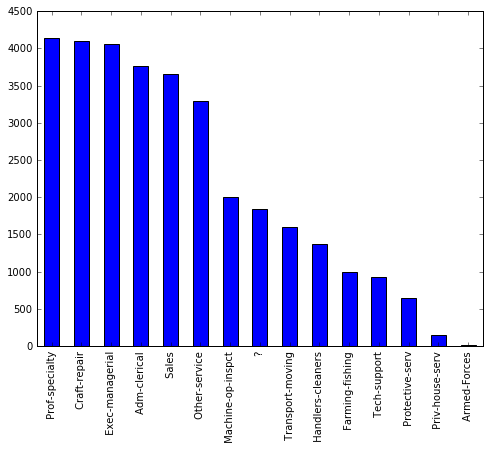

In [17]:
figsize(8,6)
data[discreete_features[3]].value_counts().plot(kind='bar')
plt.show()

Теперь построим гистограммы для непрерывных признаков, при этом разным цветом - разные таргеты

Красным - где таргет 0, синим - таргет 1

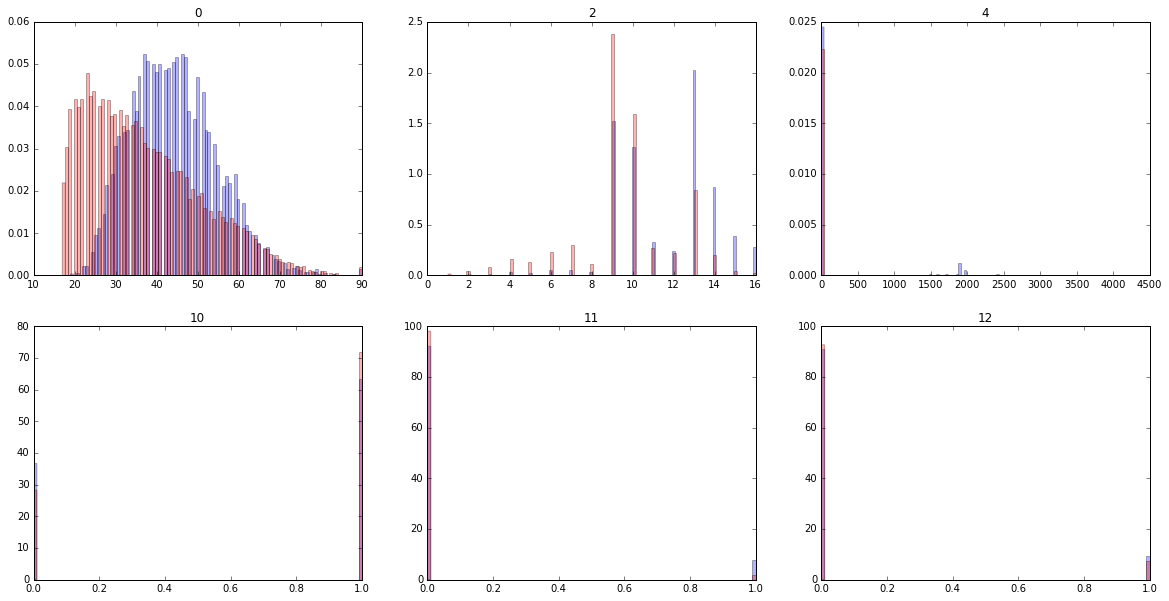

In [18]:
figsize(20,10)
plt.figure(1)
for i in range(len(continious_features)):
    plt.subplot(231 + i)
    plt.hist(X[np.where(Y == 1)[0], continious_features[i]], bins = 100, alpha = 0.3, color = 'b', normed=True)
    plt.hist(X[np.where(Y == 0)[0], continious_features[i]], bins = 100, alpha = 0.3, color = 'r', normed=True)
    plt.title(continious_features[i])
plt.show()

## Модели машинного обучения

К получившейся выборке применим различные модели Машинного Обучения

### Линейные модели

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lr = LogisticRegression()
lr.fit(X_train, Y_train.flatten())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
lr_preds = lr.predict_proba(X_test)
lr_preds

array([[ 0.72982237,  0.27017763],
       [ 0.03506048,  0.96493952],
       [ 0.69082835,  0.30917165],
       ..., 
       [ 0.71641788,  0.28358212],
       [ 0.92192874,  0.07807126],
       [ 0.87424998,  0.12575002]])

## Деревья, композиции, бустинг

### Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rf = RandomForestClassifier(n_estimators=200, max_depth=5)
rf.fit(X_train, Y_train.flatten())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [24]:
rf_preds = rf.predict_proba(X_test)
rf_preds

array([[ 0.92065546,  0.07934454],
       [ 0.52118878,  0.47881122],
       [ 0.71481779,  0.28518221],
       ..., 
       [ 0.88815438,  0.11184562],
       [ 0.90371173,  0.09628827],
       [ 0.38856595,  0.61143405]])

### Gradient Boosting

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

In [26]:
bst = GradientBoostingClassifier(n_estimators=200, max_depth=5)
bst.fit(X_train, Y_train.flatten())

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=5, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [27]:
bst_preds = bst.predict_proba(X_test)
bst_preds

array([[ 0.99155558,  0.00844442],
       [ 0.00612689,  0.99387311],
       [ 0.88705946,  0.11294054],
       ..., 
       [ 0.97296891,  0.02703109],
       [ 0.9785387 ,  0.0214613 ],
       [ 0.16223688,  0.83776312]])

## Оценка качества моделей

### Метрики

In [28]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

#### Качество Logistic Regression

In [29]:
print 'AUC', roc_auc_score(Y_test, lr_preds[:,1])
print 'accuracy', accuracy_score(Y_test, lr.predict(X_test))

AUC 0.570825783729
accuracy 0.799017349916


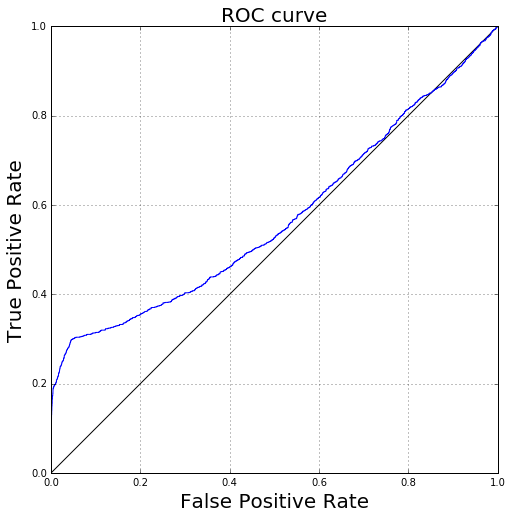

In [30]:
fpr_lr, tpr_lr, thresholds = roc_curve(Y_test, lr_preds[:,1])

figsize(8,8)
plt.plot(np.arange(0.,1.,1e-5),np.arange(0.,1.,1e-5), c='black')
plt.plot(fpr_lr,tpr_lr, c='b')
plt.title('ROC curve', size=20)
plt.xlabel('False Positive Rate', size=20)
plt.ylabel('True Positive Rate', size=20)
plt.grid()

#### Качество Random Forest

In [31]:
print 'AUC', roc_auc_score(Y_test, rf_preds[:,1])
print 'accuracy', accuracy_score(Y_test, rf.predict(X_test))

AUC 0.898554574007
accuracy 0.833717181023


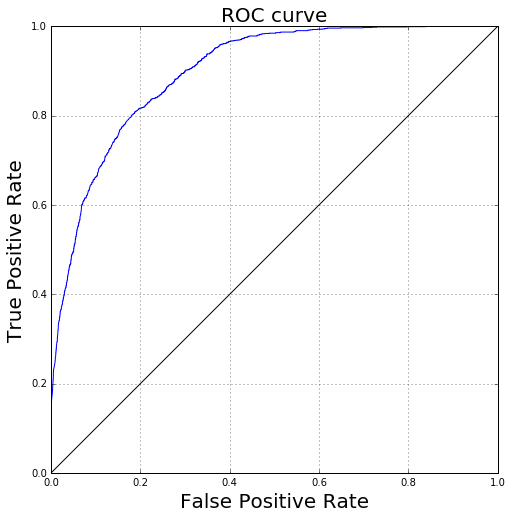

In [32]:
fpr_rf, tpr_rf, thresholds = roc_curve(Y_test, rf_preds[:,1])

figsize(8,8)
plt.plot(np.arange(0.,1.,1e-5),np.arange(0.,1.,1e-5), c='black')
plt.plot(fpr_rf,tpr_rf, c='b')
plt.title('ROC curve', size=20)
plt.xlabel('False Positive Rate', size=20)
plt.ylabel('True Positive Rate', size=20)
plt.grid()

#### Качество Gradient Boosting

In [33]:
print 'AUC', roc_auc_score(Y_test, bst_preds[:,1])
print 'accuracy', accuracy_score(Y_test, bst.predict(X_test))

AUC 0.930304408798
accuracy 0.872869645325


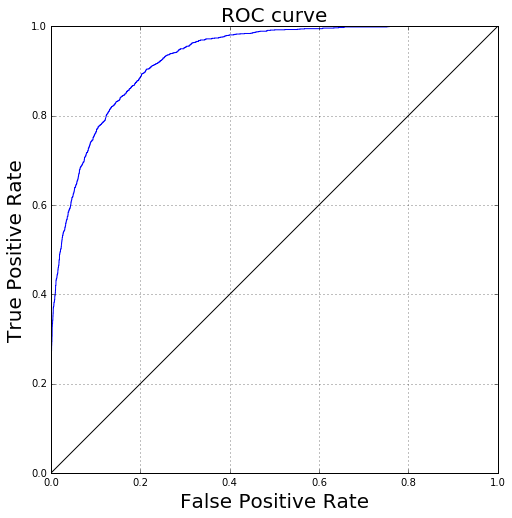

In [34]:
fpr_gb, tpr_gb, thresholds = roc_curve(Y_test, bst_preds[:,1])

figsize(8,8)
plt.plot(np.arange(0.,1.,1e-5),np.arange(0.,1.,1e-5), c='black')
plt.plot(fpr_gb,tpr_gb, c='b')
plt.title('ROC curve', size=20)
plt.xlabel('False Positive Rate', size=20)
plt.ylabel('True Positive Rate', size=20)
plt.grid()

#### Кросс-валидация

In [35]:
from sklearn.cross_validation import ShuffleSplit, KFold
from tqdm import tqdm

In [36]:
cv = KFold(X.shape[0], n_folds=5, shuffle=True, random_state=123)

lr_aucs = []
lr_accs = []
rf_aucs = []
rf_accs = []
bst_aucs = []
bst_accs = []
for train_ids, test_ids in tqdm(cv):
    X_train, Y_train = X[train_ids, :], Y[train_ids, :]
    X_test, Y_test = X[test_ids, :], Y[test_ids, :]
    lr.fit(X_train, Y_train.flatten())
    lr_aucs.append(roc_auc_score(Y_test, lr.predict_proba(X_test)[:,1]))
    lr_accs.append(accuracy_score(Y_test, lr.predict(X_test)))
    
    rf.fit(X_train, Y_train.flatten())
    rf_aucs.append(roc_auc_score(Y_test, rf.predict_proba(X_test)[:,1]))
    rf_accs.append(accuracy_score(Y_test, rf.predict(X_test)))
    
    bst.fit(X_train, Y_train.flatten())
    bst_aucs.append(roc_auc_score(Y_test, bst.predict_proba(X_test)[:,1]))
    bst_accs.append(accuracy_score(Y_test, bst.predict(X_test)))

100%|██████████| 5/5 [04:40<00:00, 55.51s/it]


#### Смотрим как себя ведёт качество на разных фолдах

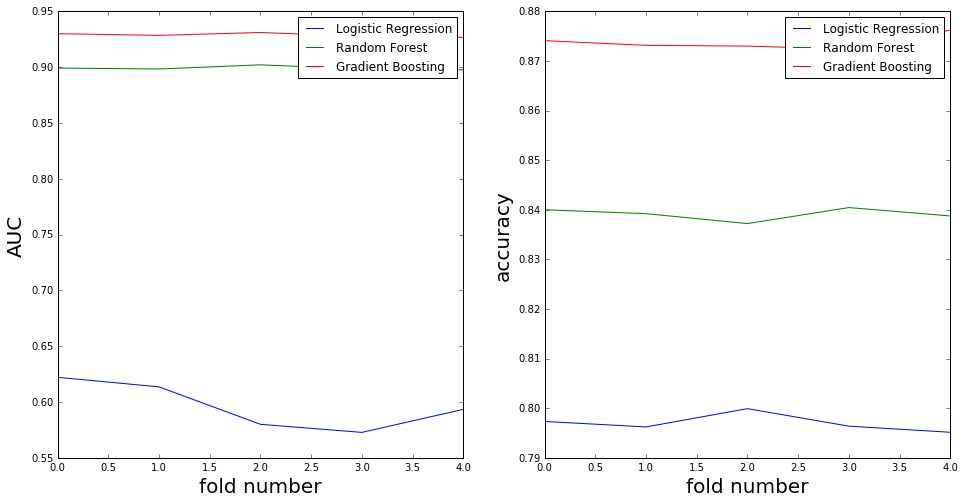

In [37]:
figsize(16,8)

plt.subplot(121)
plt.ylabel('AUC', size=20)
plt.xlabel('fold number', size=20)
plt.plot(range(5), lr_aucs, label='Logistic Regression')
plt.plot(range(5), rf_aucs, label='Random Forest')
plt.plot(range(5), bst_aucs, label='Gradient Boosting')
plt.legend()

plt.subplot(122)
plt.ylabel('accuracy', size=20)
plt.xlabel('fold number', size=20)
plt.plot(range(5), lr_accs, label='Logistic Regression')
plt.plot(range(5), rf_accs, label='Random Forest')
plt.plot(range(5), bst_accs, label='Gradient Boosting')
plt.legend()

## XGBoost

In [38]:
import xgboost as xgb

In [39]:
ids = numpy.arange(X.shape[0])
numpy.random.shuffle(ids)

train_len = int(len(ids) * 0.8)
dtrain = xgb.DMatrix(X[ids[:train_len],:], label=Y[ids[:train_len],:])
dtest = xgb.DMatrix(X[ids[train_len:],:], label=Y[ids[train_len:],:])

In [40]:
param = {'bst:max_depth':6, 'bst:eta':0.05, 'objective':'binary:logistic' }
param['eval_metric'] = 'auc'

evallist  = [(dtest,'eval'), (dtrain,'train')]
num_round = 300
bst = xgb.train(param, dtrain, num_round, evallist)

[0]	eval-auc:0.897135	train-auc:0.899652
[1]	eval-auc:0.898265	train-auc:0.901246
[2]	eval-auc:0.901657	train-auc:0.904741
[3]	eval-auc:0.902253	train-auc:0.904900
[4]	eval-auc:0.902486	train-auc:0.905188
[5]	eval-auc:0.902717	train-auc:0.905179
[6]	eval-auc:0.902963	train-auc:0.905302
[7]	eval-auc:0.906802	train-auc:0.909157
[8]	eval-auc:0.906394	train-auc:0.908932
[9]	eval-auc:0.906416	train-auc:0.909180
[10]	eval-auc:0.906722	train-auc:0.909417
[11]	eval-auc:0.907473	train-auc:0.910112
[12]	eval-auc:0.907877	train-auc:0.910470
[13]	eval-auc:0.908610	train-auc:0.911046
[14]	eval-auc:0.909162	train-auc:0.911809
[15]	eval-auc:0.909672	train-auc:0.912366
[16]	eval-auc:0.910069	train-auc:0.913085
[17]	eval-auc:0.910818	train-auc:0.913977
[18]	eval-auc:0.911233	train-auc:0.914369
[19]	eval-auc:0.911340	train-auc:0.914578
[20]	eval-auc:0.911383	train-auc:0.914829
[21]	eval-auc:0.911681	train-auc:0.915104
[22]	eval-auc:0.911770	train-auc:0.915350
[23]	eval-auc:0.912173	train-auc:0.915593
[2

### Качество XGBoost

In [42]:
labels = dtest.get_label()
preds = bst.predict(dtest)

print 'AUC', roc_auc_score(labels, preds)
print 'accuracy', accuracy_score(labels, np.array(preds > 0.5, dtype=int))

AUC 0.931513323496
accuracy 0.872101949946


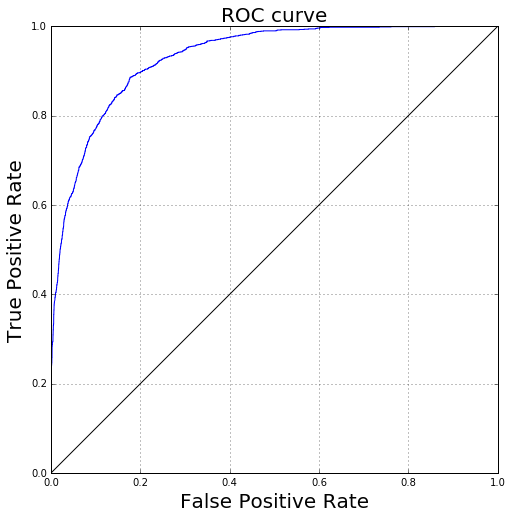

In [43]:
fpr_xgb, tpr_xgb, thresholds = roc_curve(labels, preds)

figsize(8,8)
plt.plot(np.arange(0.,1.,1e-5),np.arange(0.,1.,1e-5), c='black')
plt.plot(fpr_xgb,tpr_xgb, c='b')
plt.title('ROC curve', size=20)
plt.xlabel('False Positive Rate', size=20)
plt.ylabel('True Positive Rate', size=20)
plt.grid()

### RoC кривые разных моделей на одном графике

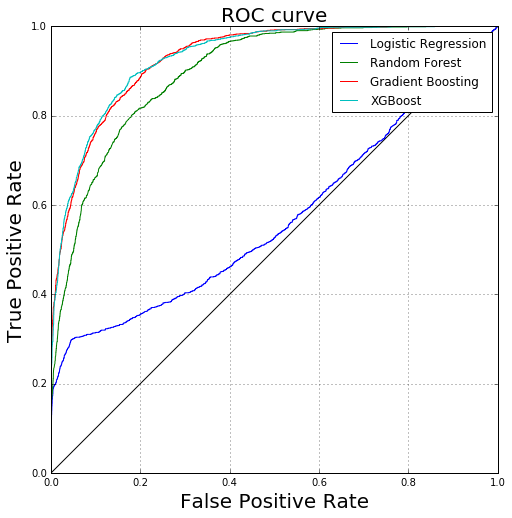

In [44]:
figsize(8,8)
plt.plot(np.arange(0.,1.,1e-5),np.arange(0.,1.,1e-5), c='black')
plt.plot(fpr_lr,tpr_lr, label = 'Logistic Regression')
plt.plot(fpr_rf,tpr_rf, label = 'Random Forest')
plt.plot(fpr_gb,tpr_gb, label = 'Gradient Boosting')
plt.plot(fpr_xgb,tpr_xgb, label = 'XGBoost')
plt.title('ROC curve', size=20)
plt.xlabel('False Positive Rate', size=20)
plt.ylabel('True Positive Rate', size=20)
plt.legend()
plt.grid()

### Feature importance

Посмотрим на важность признаков в модели

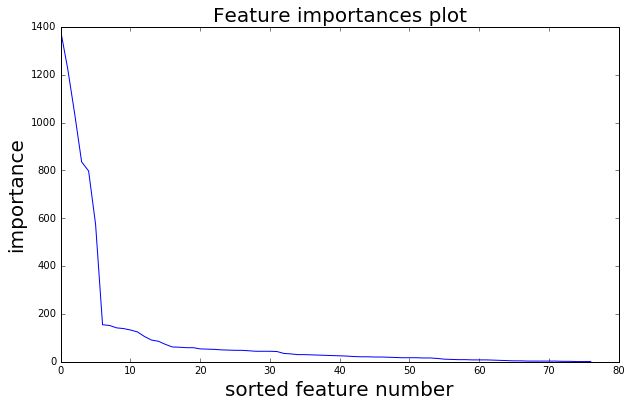

In [45]:
figsize(10,6)
plt.plot([i[1] for i in sorted(bst.get_fscore().iteritems(), key = lambda s : -s[1])])
plt.title('Feature importances plot', size=20)
plt.xlabel('sorted feature number', size=20)
plt.ylabel('importance', size=20)

### Кросс валидация для XGBoost

In [46]:
dtrain_cv = xgb.DMatrix(X, label = Y)

param = {'bst:max_depth':6, 'bst:eta':0.05, 'objective':'binary:logistic' }
param['eval_metric'] = 'auc'

num_round = 300
cv_results = xgb.cv(param, dtrain_cv, num_round, as_pandas=True)

Выведем результаты кросс-валидации на последних 10 итерациях

In [47]:
cv_results.iloc[290:,:]

,test-auc-mean,test-auc-std,train-auc-mean,train-auc-std
290,0.928893,0.002024,0.948755,0.000750
291,0.928900,0.002033,0.948790,0.000783
292,0.928922,0.002032,0.948853,0.000755
293,0.928932,0.002020,0.948920,0.000723
294,0.928942,0.002024,0.948969,0.000697
295,0.928943,0.002022,0.949021,0.000691
296,0.928949,0.002018,0.949061,0.000712
297,0.928955,0.002022,0.949103,0.000742
298,0.928953,0.002003,0.949167,0.000673
299,0.928956,0.001994,0.949215,0.000648


### Кривая обучения

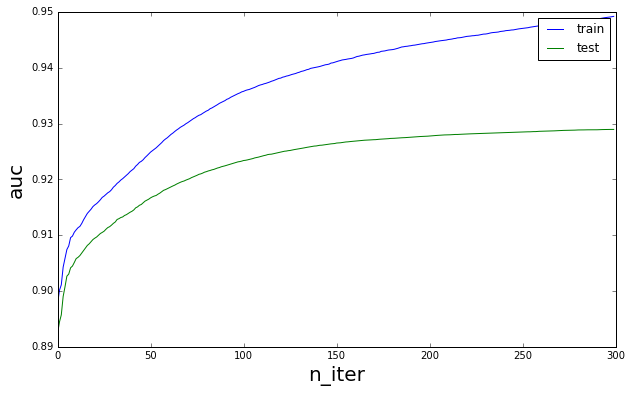

In [48]:
plt.plot(cv_results['train-auc-mean'], label = 'train')
plt.plot(cv_results['test-auc-mean'], label = 'test')
plt.xlabel('n_iter', size=20)
plt.ylabel('auc', size=20)
plt.legend()
plt.show()

## Визуализация точек на карте: pygeoplot

[пример с камерами видеонаблюдения](http://nbviewer.jupyter.org/github/romovpa/pygeoplot/blob/master/ipynb/DemoMoscowCCTV.ipynb)